# Table of Content

- ## Introduction
- ## Objective
- ## Research Question
- ## Analysis
 - #### Import necessary libraries
 - #### Read the data
 - #### Preprocessing
 - #### Exploratory Data Analysis
- ## Summary
- ## Recommendation


> # Import all necessary libraries and packages

In [44]:
#!pip install openpyxl
#import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.simplefilter(action = 'ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
sns.set(style="whitegrid")
#sns.set(style="ticks", palette="pastel")
sns.set_context('notebook')

In [3]:
import re
from scipy import stats
import numpy as np

> ### Read file from data folder

In [4]:
data = pd.read_excel('data/Week2_challenge_data_source.xlsx')

> ### Preprocessing

>
  >  ##### create a list for various data types

In [5]:
categorical_features = []
numerical_features = []
datetime_feature = []

feature = data.columns.to_series().groupby(data.dtypes).groups
for name , value in feature.items():
    if name.name == 'object':
        categorical_features.append(value)
    elif name.name in ['int64','int32','float64','float32']:
        numerical_features.append(value)
    elif name.name == 'datetime64[ns]':
        datetime_feature.append(value)

> ##### Check for in categorical features 

In [6]:
categorical_data = data[categorical_features[0]]

In [7]:
categorical_data.isna().sum()

Bearer Id                  0
Last Location Name      1153
Handset Manufacturer     572
Handset Type             572
dtype: int64

In [8]:
categorical_data.isna().sum() / len(categorical_data)

Bearer Id               0.000000
Last Location Name      0.007687
Handset Manufacturer    0.003813
Handset Type            0.003813
dtype: float64

In [9]:
def is_str(s):
    a = isinstance(s,str)
    return a

In [10]:
categorical_data['Bearer Id'].apply(is_str).sum()

991

In [11]:
categorical_data[categorical_data['Bearer Id'].apply(is_str)].head(10)

,Bearer Id,Last Location Name,Handset Manufacturer,Handset Type
463,,NaN,NaN,NaN
478,,NaN,NaN,NaN
503,,NaN,NaN,NaN
4176,,NaN,Huawei,Huawei Honor 10
4365,,NaN,NaN,NaN
4476,,NaN,NaN,NaN
4554,,NaN,NaN,NaN
4581,,NaN,NaN,NaN
4686,,NaN,NaN,NaN
4966,,NaN,NaN,NaN


> ##### Check for in numerical features

In [12]:
numerical_data = data[numerical_features[0]]

In [13]:
numerical_data.isna().sum()

Start ms                                         1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)                             754
UL TP < 10 Kbps (%)                            792
10 Kbps < UL TP < 50 Kbps (%)                  792
50 Kbps < UL TP < 300 Kbps (%)                 792
UL TP > 300 Kbps (%)           

In [14]:
numerical_data.isna().sum() / len(numerical_data)

Start ms                                    0.000007
End ms                                      0.000007
Dur. (ms)                                   0.000007
IMSI                                        0.003800
MSISDN/Number                               0.007107
IMEI                                        0.003813
Avg RTT DL (ms)                             0.185525
Avg RTT UL (ms)                             0.185412
Avg Bearer TP DL (kbps)                     0.000007
Avg Bearer TP UL (kbps)                     0.000007
TCP DL Retrans. Vol (Bytes)                 0.587636
TCP UL Retrans. Vol (Bytes)                 0.644322
DL TP < 50 Kbps (%)                         0.005027
50 Kbps < DL TP < 250 Kbps (%)              0.005027
250 Kbps < DL TP < 1 Mbps (%)               0.005027
DL TP > 1 Mbps (%)                          0.005027
UL TP < 10 Kbps (%)                         0.005280
10 Kbps < UL TP < 50 Kbps (%)               0.005280
50 Kbps < UL TP < 300 Kbps (%)              0.

In [16]:
a = numerical_data.isna().sum() / len(numerical_data)

In [17]:
high_missing_value_feature_names = []
for name, value in a.to_dict().items():
    if value > 0.01:
        high_missing_value_feature_names.append(name)

In [18]:
high_missing_value_feature_names

['Nb of sec with 125000B < Vol DL',
 'Avg RTT DL (ms)',
 'HTTP DL (Bytes)',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with 37500B < Vol UL',
 'Avg RTT UL (ms)',
 'TCP UL Retrans. Vol (Bytes)',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'HTTP UL (Bytes)',
 'TCP DL Retrans. Vol (Bytes)']

> #### Drop Rows
    
    From the exploratory analysis above, we nooticed that Bearer Id contains str object
    this object are empty strings and do not contain any information about the the user session
    so it should be dropped
    
    the MSISDN contains some missing values. This values cannot be imputed as there are unique
    MSISDN is synonymous to a mobile user phone number.
    

In [20]:
#bearer = pd.to_numeric(data['Bearer Id'], errors = 'coerce')

In [21]:
"""
remove rows with empty strings that have been converted to nan

"""

data.drop(data.loc[data['Bearer Id'].apply(is_str)].index, inplace = True)

data.drop(data.loc[data['IMSI'].isna()].index, inplace = True)

> ### TASK 1.1

#### Top 10 Handsets used by Customers

In [22]:
handset = pd.DataFrame(data['Handset Type'].value_counts().head(10)).reset_index()
handset.columns= ['Handet Type', 'Customer count']
handset

,Handet Type,Customer count
0,Huawei B528S-23A,19752
1,Apple iPhone 6S (A1688),9401
2,Apple iPhone 6 (A1586),9004
3,undefined,8960
4,Apple iPhone 7 (A1778),6301
5,Apple iPhone Se (A1723),5176
6,Apple iPhone 8 (A1905),4985
7,Apple iPhone Xr (A2105),4562
8,Samsung Galaxy S8 (Sm-G950F),4504
9,Apple iPhone X (A1901),3809


#### Top 3 Handset Manufacturers

In [23]:
top_manufacturers = data['Handset Manufacturer'].value_counts()[:3].reset_index()
top_manufacturers.columns = ['Manufacturer', ' Total phone produced']
top_manufacturers

,Manufacturer,Total phone produced
0,Apple,59440
1,Samsung,40689
2,Huawei,34353


#### top 5 handsets per handset manufacturer

#### number of sessions per user

In [27]:
number_of_sessions = data.groupby('MSISDN/Number')['Bearer Id'].count()

In [28]:
number_of_sessions.head()

MSISDN/Number
3.360100e+10    1
3.360100e+10    1
3.360100e+10    1
3.360101e+10    1
3.360101e+10    2
Name: Bearer Id, dtype: int64

In [29]:
number_of_sessions.reset_index().head()

,MSISDN/Number,Bearer Id
0,3.360100e+10,1
1,3.360100e+10,1
2,3.360100e+10,1
3,3.360101e+10,1
4,3.360101e+10,2


#### session duration

In [33]:
sessions_duration = data.groupby('MSISDN/Number')['Dur. (ms).1'].sum()
sessions_duration.reset_index().head()

,MSISDN/Number,Dur. (ms).1
0,3.360100e+10,116720140.0
1,3.360100e+10,181230963.0
2,3.360100e+10,134969374.0
3,3.360101e+10,49878024.0
4,3.360101e+10,37104453.0


#### the Total download (DL) and Upload (UL) data

In [36]:
total_download = data.groupby('MSISDN/Number')['Total UL (Bytes)','Total DL (Bytes)'].sum()
total_download.reset_index().head()

,MSISDN/Number,Total UL (Bytes),Total DL (Bytes)
0,3.360100e+10,36053108.0,8.426375e+08
1,3.360100e+10,36104459.0,1.207552e+08
2,3.360100e+10,39306820.0,5.566597e+08
3,3.360101e+10,20327526.0,4.019932e+08
4,3.360101e+10,94280527.0,1.363130e+09


In [ ]:
#total_download.get_group(208201448079117.0)

#### Feature Aggregation

#### Total Data Volume for each Application

In [37]:
data['Social_media Data Volume'] = data['Social Media DL (Bytes)'].add(data['Social Media UL (Bytes)'])
data['Google Data Volume'] = data['Google DL (Bytes)'].add(data['Google UL (Bytes)'])
data['Email Data Volume'] = data['Email DL (Bytes)'].add(data['Email UL (Bytes)'])
data['Youtube Data Volume'] = data['Youtube DL (Bytes)'].add(data['Youtube UL (Bytes)'])
data['Netflix Data Volume'] = data['Netflix DL (Bytes)'].add(data['Netflix UL (Bytes)'])
data['Gaming Data Volume'] = data['Gaming DL (Bytes)'].add(data['Gaming UL (Bytes)'])
data['Other Data Volume'] = data['Other DL (Bytes)'].add(data['Other UL (Bytes)'])

In [82]:
total_download_app = data.groupby('MSISDN/Number')['Social_media Data Volume','Google Data Volume',\
                                            'Other Data Volume', 'Email Data Volume', \
                                          'Youtube Data Volume', 'Netflix Data Volume', \
                                           'Gaming Data Volume'].sum().reset_index()

## Interim Solution

In [135]:
data2 = data[['Bearer Id','Dur. (ms).1','Total UL (Bytes)','Total DL (Bytes)','Social_media Data Volume','Google Data Volume',\
                                            'Other Data Volume', 'Email Data Volume', \
                                          'Youtube Data Volume', 'Netflix Data Volume', \
                                           'Gaming Data Volume']]

In [136]:
# create a new column which is the addition of total download and total upload
data2['Total Data Volume'] = data['Total DL (Bytes)'].add(data['Total UL (Bytes)'])

In [137]:
data2.head(3)

,Bearer Id,Dur. (ms).1,Total UL (Bytes),Total DL (Bytes),Social_media Data Volume,Google Data Volume,Other Data Volume,Email Data Volume,Youtube Data Volume,Netflix Data Volume,Gaming Data Volume,Total Data Volume
0,13114483460844900352,1.823653e+09,36749741.0,308879636.0,1570185.0,2905912.0,180558843.0,3701304.0,18355943.0,17855187.0,292426453.0,345629377.0
1,13114483482878900224,1.365104e+09,53800391.0,653384965.0,1933278.0,4414096.0,541959383.0,937385.0,39359124.0,35565545.0,609920783.0,707185356.0
2,13114483484080500736,1.361763e+09,27883638.0,279807335.0,1726277.0,10229119.0,414908351.0,3363124.0,34425237.0,23751202.0,229980251.0,307690973.0


#### Convert bytes to megabytes

In [138]:
def bytes_to_megabytes(num):
    mb = 1024 ** 2
    return float('{0:.2f}'.format(num/mb))

In [139]:
data_mb = data2[['Total UL (Bytes)','Total DL (Bytes)','Social_media Data Volume','Google Data Volume',\
        'Other Data Volume', 'Email Data Volume','Youtube Data Volume', 'Netflix Data Volume', \
         'Gaming Data Volume','Total Data Volume']].applymap(bytes_to_megabytes)

In [140]:
data_mb[['Bearer Id','Dur. (ms).1']] = data2[['Bearer Id','Dur. (ms).1']]

In [141]:
data_mb.head()

,Total UL (Bytes),Total DL (Bytes),Social_media Data Volume,Google Data Volume,Other Data Volume,Email Data Volume,Youtube Data Volume,Netflix Data Volume,Gaming Data Volume,Total Data Volume,Bearer Id,Dur. (ms).1
0,35.05,294.57,1.50,2.77,172.19,3.53,17.51,17.03,278.88,329.62,13114483460844900352,1.823653e+09
1,51.31,623.12,1.84,4.21,516.85,0.89,37.54,33.92,581.67,674.42,13114483482878900224,1.365104e+09
2,26.59,266.85,1.65,9.76,395.69,3.21,32.83,22.65,219.33,293.44,13114483484080500736,1.361763e+09
3,41.32,806.84,0.63,11.26,726.54,1.98,34.84,14.39,772.85,848.15,13114483485442799616,1.321510e+09
4,36.76,542.77,0.87,7.39,538.46,2.01,32.64,16.73,506.63,579.53,13114483499480700928,1.089009e+09


In [134]:
#pd.merge(data2[['Bearer Id','Dur. (ms).1']], data_mb , right_index= True , left_index=True)

In [125]:
#data2[['Bearer Id','Dur. (ms).1']].append(data_mb, ignore_index=True).head()

In [126]:
#data.head()

#### Remove Outliers

In [146]:
data_outliers = data_mb.iloc[:,:-2] 
data_outliers.head()

,Total UL (Bytes),Total DL (Bytes),Social_media Data Volume,Google Data Volume,Other Data Volume,Email Data Volume,Youtube Data Volume,Netflix Data Volume,Gaming Data Volume,Total Data Volume
0,35.05,294.57,1.50,2.77,172.19,3.53,17.51,17.03,278.88,329.62
1,51.31,623.12,1.84,4.21,516.85,0.89,37.54,33.92,581.67,674.42
2,26.59,266.85,1.65,9.76,395.69,3.21,32.83,22.65,219.33,293.44
3,41.32,806.84,0.63,11.26,726.54,1.98,34.84,14.39,772.85,848.15
4,36.76,542.77,0.87,7.39,538.46,2.01,32.64,16.73,506.63,579.53


In [147]:
"""
Using the zscore and a threshold of 3 remove outliers from the da 
"""

z = np.abs(stats.zscore(data_outliers))
data_outliers = data_outliers[(z < 3).all(axis=1)]

In [148]:
data_outliers.shape

(148946, 10)

#### Non Graphical Univariate Analysis

In [ ]:
#data_outliers.describe()

In [149]:
descriptive_analysis = data_outliers.describe()

In [150]:
descriptive_analysis.to_excel('data/Descriptive Table.xlsx')

#### Box Plot on all Variable of Interest

In [152]:
"""
fig, ax = plt.subplots(figsize = (10,8))
ax = sns.boxplot(data = data_outliers ,y = 'Bearer Id', linewidth = 2.5, width = 0.3)
ax.set_title('Box Plot of User sessions', fontsize = 20)
ax.set_ylabel('Bearer Id',fontsize = 15)
plt.savefig('fig/user_session.png')
#ax = sns.swarmplot(x="Bearer Id", data=data2, color=".25")

"""

'\nfig, ax = plt.subplots(figsize = (10,8))\nax = sns.boxplot(data = data_outliers ,y = \'Bearer Id\', linewidth = 2.5, width = 0.3)\nax.set_title(\'Box Plot of User sessions\', fontsize = 20)\nax.set_ylabel(\'Bearer Id\',fontsize = 15)\nplt.savefig(\'fig/user_session.png\')\n#ax = sns.swarmplot(x="Bearer Id", data=data2, color=".25")\n\n'

In [153]:
"""
fig, ax = plt.subplots(figsize = (10,8))
ax = sns.boxplot(data = data2 ,y = 'Dur. (ms).1', linewidth = 2.5, width = 0.3)
ax.set_title('Box Plot of Sessions Duration', fontsize = 20)
ax.set_ylabel('Duration',fontsize = 15)
plt.savefig('fig/session_duration.png')

"""

"\nfig, ax = plt.subplots(figsize = (10,8))\nax = sns.boxplot(data = data2 ,y = 'Dur. (ms).1', linewidth = 2.5, width = 0.3)\nax.set_title('Box Plot of Sessions Duration', fontsize = 20)\nax.set_ylabel('Duration',fontsize = 15)\nplt.savefig('fig/session_duration.png')\n\n"

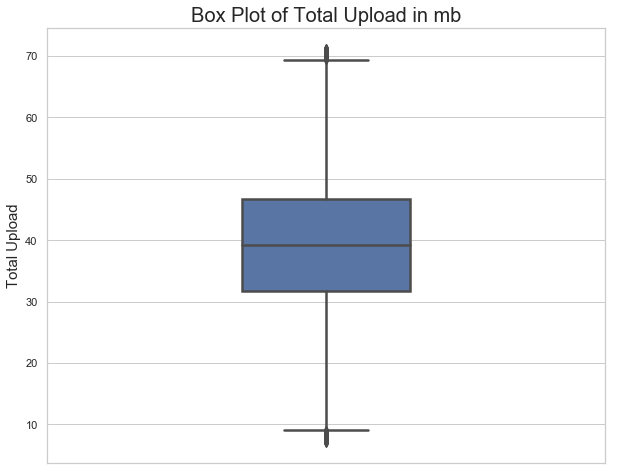

In [157]:
fig, ax = plt.subplots(figsize = (10,8))
ax = sns.boxplot(data = data_outliers ,y = 'Total UL (Bytes)', linewidth = 2.5, width = 0.3)
ax.set_title('Box Plot of Total Upload in mb', fontsize = 20)
ax.set_ylabel('Total Upload',fontsize = 15)
plt.savefig('fig/total_upload.png')

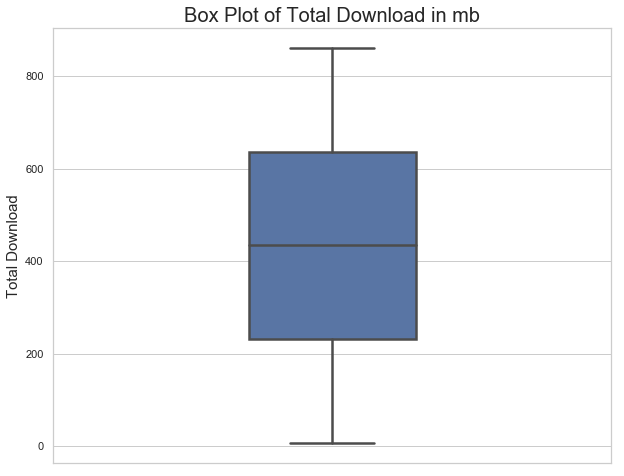

In [158]:
fig, ax = plt.subplots(figsize = (10,8))
ax = sns.boxplot(data = data_outliers ,y = 'Total DL (Bytes)', linewidth = 2.5, width = 0.3)
ax.set_title('Box Plot of Total Download in mb', fontsize = 20)
ax.set_ylabel('Total Download',fontsize = 15)
plt.savefig('fig/total_download.png')

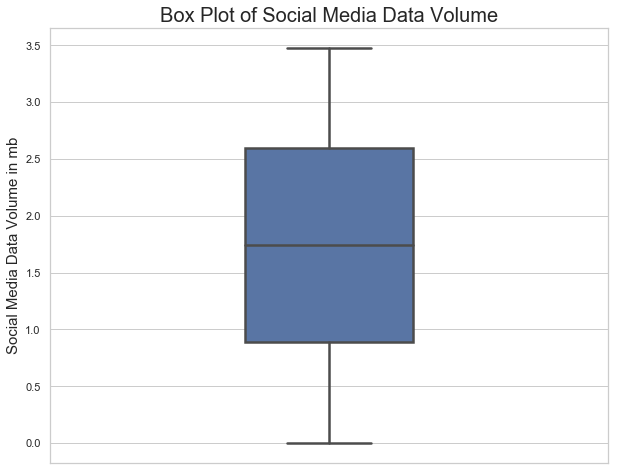

In [159]:
fig, ax = plt.subplots(figsize = (10,8))
ax = sns.boxplot(data = data_outliers ,y = 'Social_media Data Volume', linewidth = 2.5, width = 0.3)
ax.set_title('Box Plot of Social Media Data Volume', fontsize = 20)
ax.set_ylabel('Social Media Data Volume in mb',fontsize = 15)
plt.savefig('fig/social_media.png')

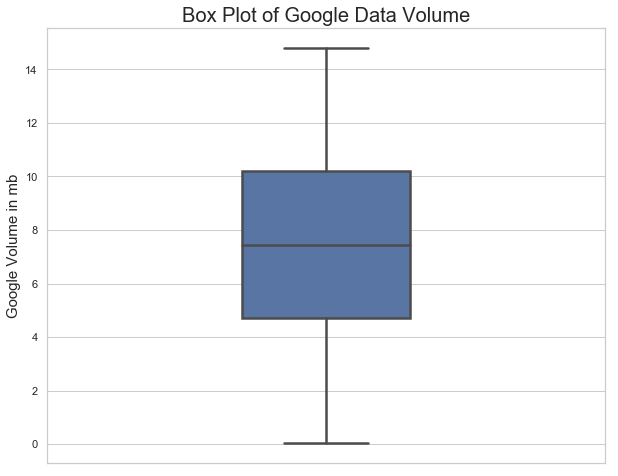

In [166]:
fig, ax = plt.subplots(figsize = (10,8))
ax = sns.boxplot(data = data_outliers ,y = 'Google Data Volume', linewidth = 2.5, width = 0.3)
ax.set_title('Box Plot of Google Data Volume', fontsize = 20)
ax.set_ylabel('Google Volume in mb',fontsize = 15)
plt.savefig('fig/Google.png')

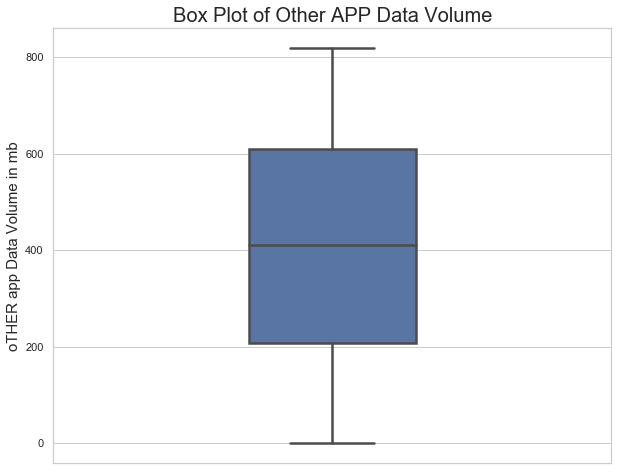

In [167]:
fig, ax = plt.subplots(figsize = (10,8))
ax = sns.boxplot(data = data_outliers ,y = 'Other Data Volume', linewidth = 2.5, width = 0.3)
ax.set_title('Box Plot of Other APP Data Volume', fontsize = 20)
ax.set_ylabel('oTHER app Data Volume in mb',fontsize = 15)
plt.savefig('fig/other_app.png')

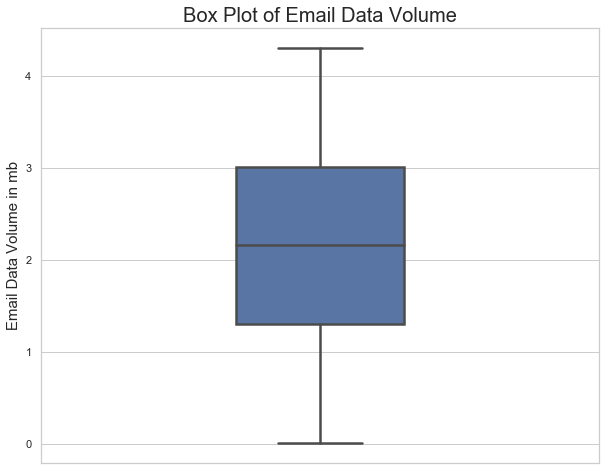

In [168]:
fig, ax = plt.subplots(figsize = (10,8))
ax = sns.boxplot(data = data_outliers ,y = 'Email Data Volume', linewidth = 2.5, width = 0.3)
ax.set_title('Box Plot of Email Data Volume', fontsize = 20)
ax.set_ylabel('Email Data Volume in mb',fontsize = 15)
plt.savefig('fig/Email.png')

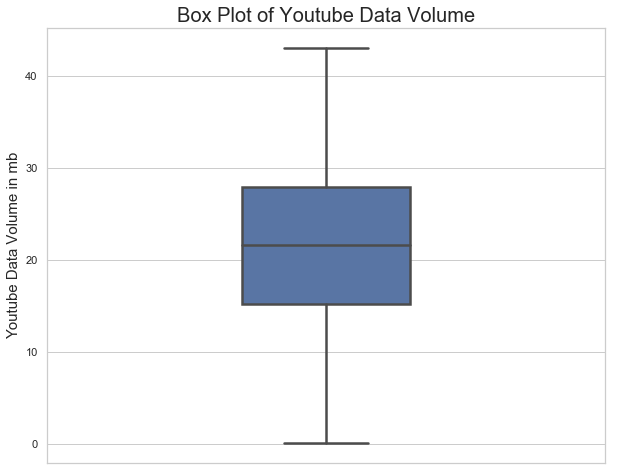

In [169]:
fig, ax = plt.subplots(figsize = (10,8))
ax = sns.boxplot(data = data_outliers ,y = 'Youtube Data Volume', linewidth = 2.5, width = 0.3)
ax.set_title('Box Plot of Youtube Data Volume', fontsize = 20)
ax.set_ylabel('Youtube Data Volume in mb',fontsize = 15)
plt.savefig('fig/youtube.png')

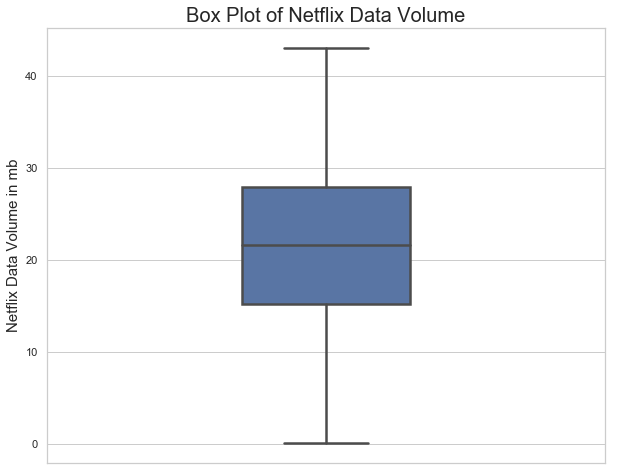

In [170]:
fig, ax = plt.subplots(figsize = (10,8))
ax = sns.boxplot(data = data_outliers ,y = 'Netflix Data Volume', linewidth = 2.5, width = 0.3)
ax.set_title('Box Plot of Netflix Data Volume', fontsize = 20)
ax.set_ylabel('Netflix Data Volume in mb',fontsize = 15)
plt.savefig('fig/Netflix.png')

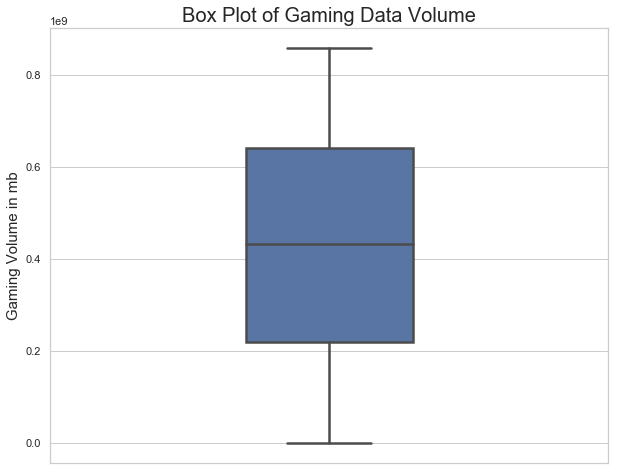

In [165]:
fig, ax = plt.subplots(figsize = (10,8))
ax = sns.boxplot(data = data2 ,y = 'Gaming Data Volume', linewidth = 2.5, width = 0.3)
ax.set_title('Box Plot of Gaming Data Volume', fontsize = 20)
ax.set_ylabel('Gaming Volume in mb',fontsize = 15)
plt.savefig('fig/Gaming.png')

####  Bivariate Analysis on All applicatiions and Total Data using scatter Plot 

In [ ]:
sns.scatterplot(x=’tip’, y=’total_bill’, data=tips_data, marker=’D’)
fig, ax = plt.subplots(figsize = (10,8))
ax = sns.boxplot(data = data2 ,y = 'Social_media Data Volume', linewidth = 2.5, width = 0.3)

In [ ]:
sns.scatterplot(x=’tip’, y=’total_bill’, data=tips_data, marker=’D’)
fig, ax = plt.subplots(figsize = (10,8))
ax = sns.boxplot(data = data2 ,y = 'Google Data Volume', linewidth = 2.5, width = 0.3)

In [ ]:
sns.scatterplot(x=’tip’, y=’total_bill’, data=tips_data, marker=’D’)
fig, ax = plt.subplots(figsize = (10,8))
ax = sns.boxplot(data = data2 ,y = 'Gaming Data Volume', linewidth = 2.5, width = 0.3)

In [ ]:
sns.scatterplot(x=’tip’, y=’total_bill’, data=tips_data, marker=’D’)
fig, ax = plt.subplots(figsize = (10,8))
ax = sns.boxplot(data = data2 ,y = 'Netflix Data Volume', linewidth = 2.5, width = 0.3)

In [ ]:
sns.scatterplot(x=’tip’, y=’total_bill’, data=tips_data, marker=’D’)
fig, ax = plt.subplots(figsize = (10,8))
ax = sns.boxplot(data = data2 ,y = 'Youtube Data Volume', linewidth = 2.5, width = 0.3)

In [ ]:
#sns.scatterplot(x=’tip’, y=’total_bill’, data=tips_data, marker=’D’)
fig, ax = plt.subplots(figsize = (10,8))
ax = sns.scatterplot(data = data2 ,x = 'Email Data Volume',y='Total Data Volume', marker='D')